In [1]:
import numpy as np
from regression import NodeMaze
import parameters as p
from MM_Traj_Utils import LoadTrajFromPath
import utils

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
b5tf = LoadTrajFromPath(p.OUTDATA_PATH + 'B5-tf')
b5eps = utils.convert_traj_to_episodes(b5tf)
len(b5eps)
# b5tf = LoadTrajFromPath(p.OUTDATA_PATH + 'B5-tf')

245

In [4]:
nodemaze = NodeMaze()
lls_array = []
step = 0.5
ll_max = -1e9
coef_max = None
for c1 in np.arange(0, 1, step):
    for c2 in np.arange(0, 1, step):
        for c3 in np.arange(0, 1, step):
            for c4 in np.arange(0, 1, step):
                coef = np.array([c1, c2, c3, c4])
                print(coef, end="\t ")
                ll = nodemaze.get_distance_LL(b5eps[:200], coef)
                print(ll)
                if ll > ll_max:
                    ll_max = ll
                    coef_max = coef
                # lls_dict[tuple(coef)] = ll
                lls_array.append([*list(coef), ll])
lls_array = np.array(lls_array)

[0. 0. 0. 0.]	 -10646.651689481374
[0.  0.  0.  0.5]	 -10856.401032998809
[0.  0.  0.5 0. ]	 -10143.189650490836
[0.  0.  0.5 0.5]	 -11729.162627984642
[0.  0.5 0.  0. ]	 -10153.502641571406
[0.  0.5 0.  0.5]	 -11417.927949729039
[0.  0.5 0.5 0. ]	 -10807.696264988454
[0.  0.5 0.5 0.5]	 -12791.96290661996
[0.5 0.  0.  0. ]	 -10730.212871603797
[0.5 0.  0.  0.5]	 -10996.150919455155
[0.5 0.  0.5 0. ]	 -10313.865048680114
[0.5 0.  0.5 0.5]	 -11893.31880141382
[0.5 0.5 0.  0. ]	 -10344.664352961467
[0.5 0.5 0.  0.5]	 -11604.206868373374
[0.5 0.5 0.5 0. ]	 -11035.894121860565
[0.5 0.5 0.5 0.5]	 -13002.258266886649


In [10]:
lls_sorted = np.array(sorted(lls_array, key=lambda x: x[4], reverse=True))
lls_sorted

array([[ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01,
         0.00000000e+00, -1.01431897e+04],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         0.00000000e+00, -1.01535026e+04],
       [ 5.00000000e-01,  0.00000000e+00,  5.00000000e-01,
         0.00000000e+00, -1.03138650e+04],
       [ 5.00000000e-01,  5.00000000e-01,  0.00000000e+00,
         0.00000000e+00, -1.03446644e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.06466517e+04],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.07302129e+04],
       [ 0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
         0.00000000e+00, -1.08076963e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01, -1.08564010e+04],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01, -1.09961509e+04],
       [ 5.00000000e-01,  5.00000000e-01,  5.00000000e-01,
         0.00000000e+00

In [11]:
for coef_set in lls_sorted:
    ll = nodemaze.get_distance_LL(b5eps[200:], coef_set[:4])
    print(coef_set[:4], ll)

[0.  0.  0.5 0. ] -2095.3187878835593
[0.  0.5 0.  0. ] -2166.9439097867516
[0.5 0.  0.5 0. ] -2144.750719831447
[0.5 0.5 0.  0. ] -2208.715992337996
[0. 0. 0. 0.] -2203.8162510682787
[0.5 0.  0.  0. ] -2223.077739459165
[0.  0.5 0.5 0. ] -2301.3771910729483
[0.  0.  0.  0.5] -2287.8776403105135
[0.5 0.  0.  0.5] -2329.3450809624483
[0.5 0.5 0.5 0. ] -2361.8767558277204
[0.  0.5 0.  0.5] -2483.955869452747
[0.5 0.5 0.  0.5] -2533.0332687803425
[0.  0.  0.5 0.5] -2470.0400902181186
[0.5 0.  0.5 0.5] -2521.3481262563246
[0.  0.5 0.5 0.5] -2765.8167779918226
[0.5 0.5 0.5 0.5] -2826.1642314197356


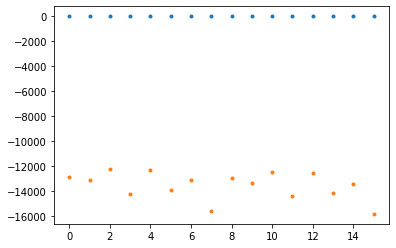

In [32]:
plt.plot(lls_array[:, [0, 4]], '.')

In [33]:
lls_array

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.28504679e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01, -1.31442787e+04],
       [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01,
         0.00000000e+00, -1.22385084e+04],
       [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01,
         5.00000000e-01, -1.41992027e+04],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         0.00000000e+00, -1.23204466e+04],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         5.00000000e-01, -1.39018838e+04],
       [ 0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
         0.00000000e+00, -1.31090735e+04],
       [ 0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
         5.00000000e-01, -1.55577797e+04],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.29532906e+04],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01